In [16]:
import pandas as pd
import numpy as np

# Read the male data, skipping lines starting with "#"
male_df = pd.read_csv("nhanes_adult_male_bmx_2020.csv", comment="#")

# Convert to NumPy array
male = male_df.to_numpy()

# Check shape and a few rows
print("Male shape:", male.shape)
print(male[:5])  # First 5 rows


Male shape: (4081, 7)
[[ 98.8 182.3  42.   40.1  38.2 108.2 120.4]
 [ 74.3 184.2  41.1  41.   30.2  94.5  86.8]
 [103.7 185.3  47.   44.   32.  107.8 109.6]
 [ 86.  167.8  39.5  38.4  29.  106.4 108.3]
 [ 99.4 181.6  40.4  39.9  36.  120.2 107. ]]


In [17]:
import pandas as pd
import numpy as np

# Read the male data, skipping lines starting with "#"
male_df = pd.read_csv("nhanes_adult_female_bmx_2020.csv", comment="#")

# Convert to NumPy array
male = male_df.to_numpy()

# Check shape and a few rows
print("Male shape:", male.shape)
print(male[:5])  # First 5 rows


Male shape: (4221, 7)
[[ 97.1 160.2  34.7  40.8  35.8 126.1 117.9]
 [ 91.1 152.7  33.5  33.   38.5 125.5 103.1]
 [ 73.  161.2  37.4  38.   31.8 106.2  92. ]
 [ 61.7 157.4  38.   34.7  29.  101.   90.5]
 [ 55.4 154.6  34.6  34.   28.3  92.5  73.2]]


Matplotlib is building the font cache; this may take a moment.


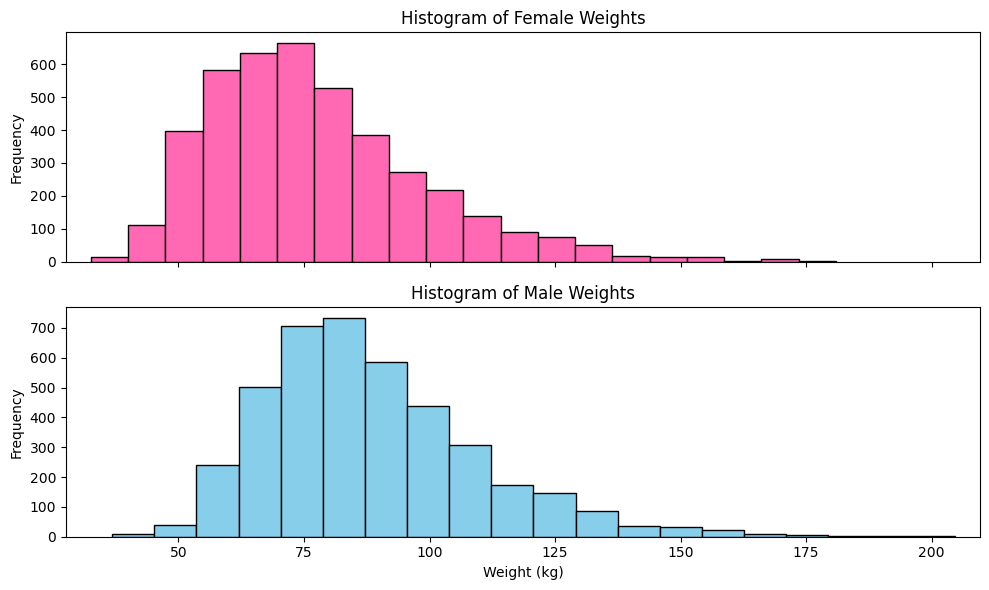

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSVs while skipping comments
male_df = pd.read_csv("nhanes_adult_male_bmx_2020.csv", comment="#")
female_df = pd.read_csv("nhanes_adult_female_bmx_2020.csv", comment="#")

# Extract weight column (1st column)
male_weights = male_df.iloc[:, 0]
female_weights = female_df.iloc[:, 0]

# Determine common x-axis limits
all_weights = pd.concat([male_weights, female_weights])
x_min = all_weights.min() - 5
x_max = all_weights.max() + 5

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Female weights histogram (top)
ax1.hist(female_weights, bins=20, color='hotpink', edgecolor='black')
ax1.set_title("Histogram of Female Weights")
ax1.set_ylabel("Frequency")
ax1.set_xlim(x_min, x_max)

# Male weights histogram (bottom)
ax2.hist(male_weights, bins=20, color='skyblue', edgecolor='black')
ax2.set_title("Histogram of Male Weights")
ax2.set_xlabel("Weight (kg)")
ax2.set_ylabel("Frequency")
ax2.set_xlim(x_min, x_max)

# Layout adjustment
plt.tight_layout()
plt.show()


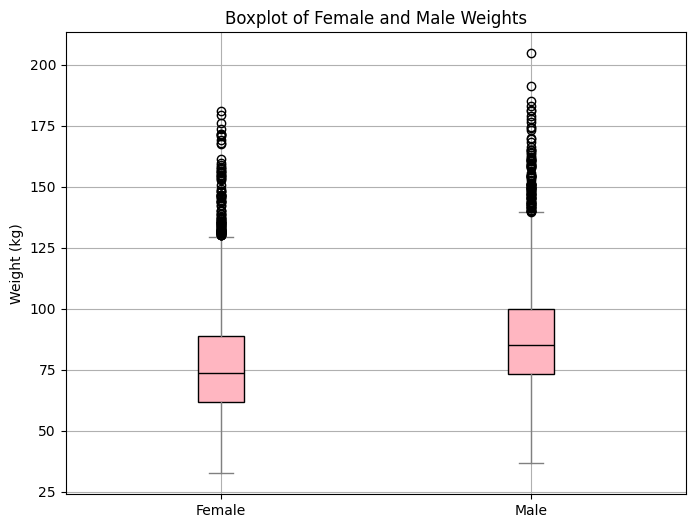

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSVs while skipping comment lines
male_df = pd.read_csv("nhanes_adult_male_bmx_2020.csv", comment="#")
female_df = pd.read_csv("nhanes_adult_female_bmx_2020.csv", comment="#")

# Extract weight column (first column)
male_weights = male_df.iloc[:, 0]
female_weights = female_df.iloc[:, 0]

# Create boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([female_weights, male_weights], labels=['Female', 'Male'], patch_artist=True,
            boxprops=dict(facecolor='lightpink'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='gray'),
            capprops=dict(color='gray'))

plt.title("Boxplot of Female and Male Weights")
plt.ylabel("Weight (kg)")
plt.grid(True)
plt.show()


In [21]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Load data
male_df = pd.read_csv("nhanes_adult_male_bmx_2020.csv", comment="#")
female_df = pd.read_csv("nhanes_adult_female_bmx_2020.csv", comment="#")

# Extract weights
male_weights = male_df.iloc[:, 0]
female_weights = female_df.iloc[:, 0]

# Define a function to compute statistics
def describe_weights(data):
    return {
        'Count': data.count(),
        'Mean': data.mean(),
        'Median': data.median(),
        'Min': data.min(),
        'Max': data.max(),
        'Std Dev': data.std(),
        'IQR': data.quantile(0.75) - data.quantile(0.25),
        'Skewness': skew(data.dropna()),
        'Kurtosis': kurtosis(data.dropna())
    }

# Compute for both
male_stats = describe_weights(male_weights)
female_stats = describe_weights(female_weights)

# Display
print("Male Weight Statistics:\n", pd.Series(male_stats))
print("\nFemale Weight Statistics:\n", pd.Series(female_stats))


Male Weight Statistics:
 Count       4081.000000
Mean          88.364543
Median        85.000000
Min           36.800000
Max          204.600000
Std Dev       21.421561
IQR           26.500000
Skewness       0.984281
Kurtosis       1.474288
dtype: float64

Female Weight Statistics:
 Count       4221.000000
Mean          77.403791
Median        73.600000
Min           32.600000
Max          180.900000
Std Dev       21.545061
IQR           27.100000
Skewness       1.033361
Kurtosis       1.400968
dtype: float64


In [22]:
import numpy as np
import pandas as pd

# Load the female dataset
female_df = pd.read_csv("nhanes_adult_female_bmx_2020.csv", comment="#")
female = female_df.to_numpy()

# Extract weight (kg) and height (cm)
weights = female[:, 0]  # column 1
heights_cm = female[:, 1]  # column 2
heights_m = heights_cm / 100  # convert to meters

# Compute BMI
bmis = weights / (heights_m ** 2)

# Add BMI as the 8th column
female = np.column_stack((female, bmis))

# Optional: Check the shape and first 5 rows
print("New female matrix shape:", female.shape)
print("First 5 rows with BMI:\n", female[:5])


New female matrix shape: (4221, 8)
First 5 rows with BMI:
 [[ 97.1        160.2         34.7         40.8         35.8
  126.1        117.9         37.83504078]
 [ 91.1        152.7         33.5         33.          38.5
  125.5        103.1         39.06972037]
 [ 73.         161.2         37.4         38.          31.8
  106.2         92.          28.09265496]
 [ 61.7        157.4         38.          34.7         29.
  101.          90.5         24.90437849]
 [ 55.4        154.6         34.6         34.          28.3
   92.5         73.2         23.17879132]]


In [23]:
import numpy as np

# Assuming 'female' matrix has 8 columns now (including BMI)
# Compute column-wise means and standard deviations
means = female.mean(axis=0)
stds = female.std(axis=0)

# Standardize each column (z-score)
zfemale = (female - means) / stds

# Optional: check the shape and first few rows
print("zfemale shape:", zfemale.shape)
print("First 5 rows:\n", zfemale[:5])


zfemale shape: (4221, 8)
First 5 rows:
 [[ 0.91429508  0.00895038 -0.56739463  1.13298804  0.55084546  1.08316157
   1.11578462  0.9969677 ]
 [ 0.63577599 -1.05306843 -1.07893145 -1.29349161  1.03221804  1.04475528
   0.265089    1.15617483]
 [-0.2044233   0.15055289  0.5835632   0.26194406 -0.1622991  -0.19064688
  -0.37293272 -0.25927501]
 [-0.7289676  -0.38753664  0.83933161 -0.76464348 -0.66150029 -0.52350135
  -0.45915188 -0.67039085]
 [-1.02141265 -0.78402366 -0.6100227  -0.98240447 -0.78630059 -1.06759039
  -1.45354609 -0.89289859]]


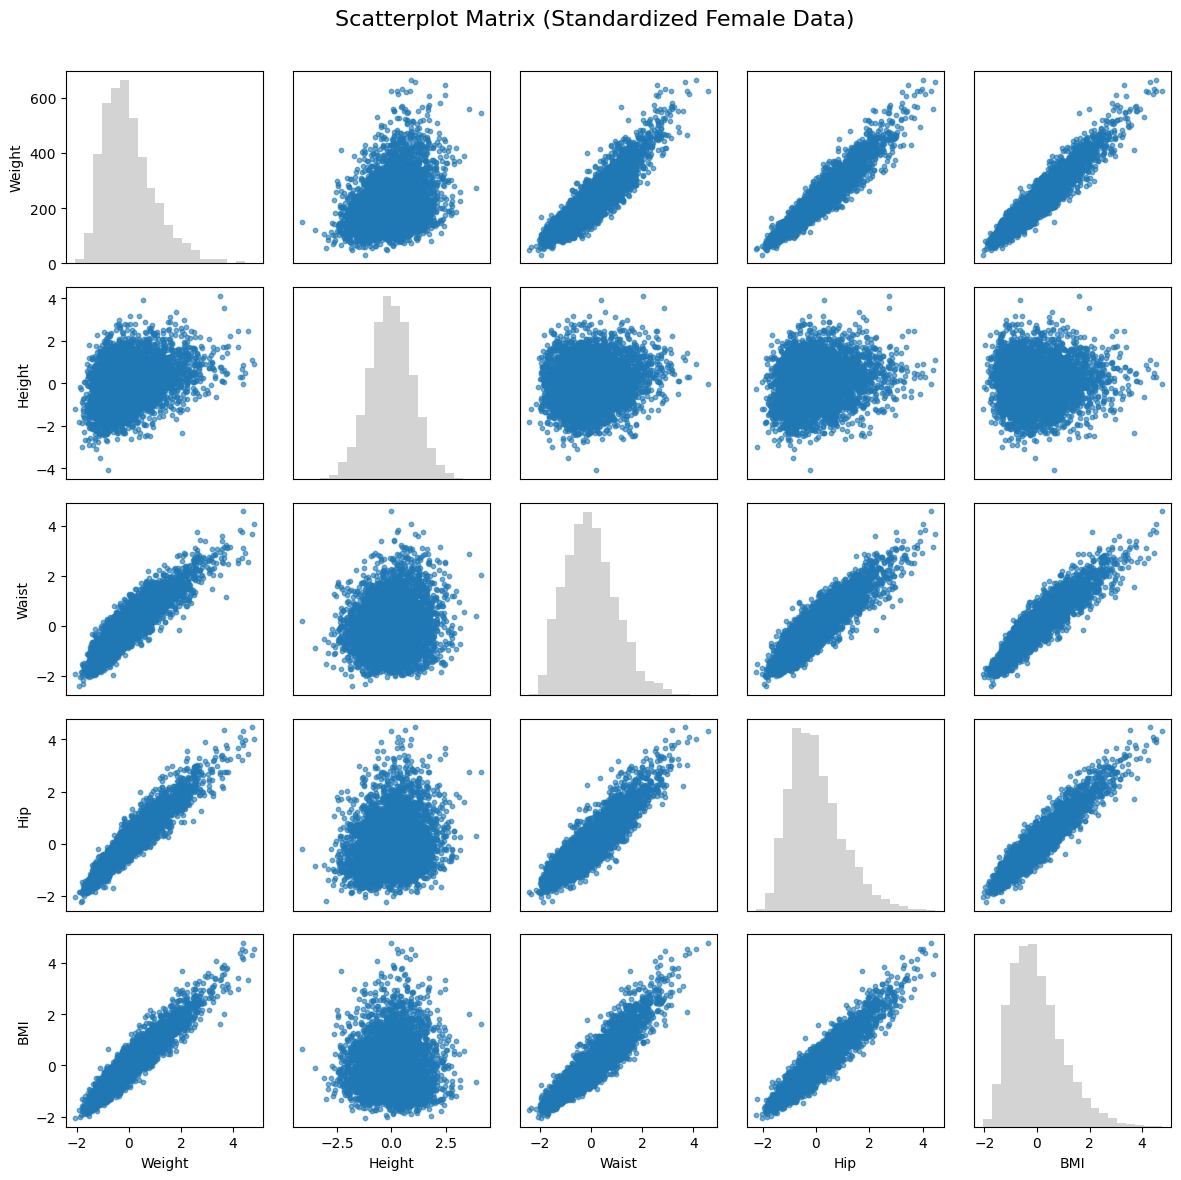

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

# Select relevant columns from zfemale
columns_idx = [0, 1, 6, 5, 7]  # Weight, Height, Waist, Hip, BMI
col_names = ["Weight", "Height", "Waist", "Hip", "BMI"]

# Convert to DataFrame
df = pd.DataFrame(zfemale[:, columns_idx], columns=col_names)

# Create scatterplot matrix manually
n = len(col_names)
fig, axes = plt.subplots(n, n, figsize=(12, 12))

for i in range(n):
    for j in range(n):
        ax = axes[i, j]
        if i == j:
            # Diagonal: histogram
            ax.hist(df[col_names[i]], bins=20, color='lightgray')
        else:
            # Scatterplots
            ax.scatter(df[col_names[j]], df[col_names[i]], s=10, alpha=0.6)
        
        if i == n - 1:
            ax.set_xlabel(col_names[j])
        else:
            ax.set_xticks([])

        if j == 0:
            ax.set_ylabel(col_names[i])
        else:
            ax.set_yticks([])

plt.suptitle("Scatterplot Matrix (Standardized Female Data)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


In [27]:
import numpy as np
import pandas as pd

# Load data (skip comment lines)
male_df = pd.read_csv("nhanes_adult_male_bmx_2020.csv", comment="#")
female_df = pd.read_csv("nhanes_adult_female_bmx_2020.csv", comment="#")

# Convert to numpy matrices
male = male_df.to_numpy()
female = female_df.to_numpy()

# Extract required columns
# Column indices: 1 = height (cm), 5 = hip (cm), 6 = waist (cm)

# --- For Male ---
male_height = male[:, 1]
male_hip = male[:, 5]
male_waist = male[:, 6]

male_whtr = male_waist / male_height
male_whr = male_waist / male_hip

# Add as new columns (columns 8 and 9)
male = np.column_stack((male, male_whtr, male_whr))

# --- For Female ---
female_height = female[:, 1]
female_hip = female[:, 5]
female_waist = female[:, 6]

female_whtr = female_waist / female_height
female_whr = female_waist / female_hip

# Add as new columns (columns 8 and 9)
female = np.column_stack((female, female_whtr, female_whr))

# Optional: check dimensions and sample output
print("Male matrix shape:", male.shape)
print("Female matrix shape:", female.shape)
print("\nFirst 3 rows of male data with ratios:\n", male[:3, -2:])
print("\nFirst 3 rows of female data with ratios:\n", female[:3, -2:])


Male matrix shape: (4081, 9)
Female matrix shape: (4221, 9)

First 3 rows of male data with ratios:
 [[0.66044981 1.11275416]
 [0.47122693 0.91851852]
 [0.59147329 1.01669759]]

First 3 rows of female data with ratios:
 [[0.73595506 0.93497224]
 [0.67518009 0.82151394]
 [0.5707196  0.86629002]]


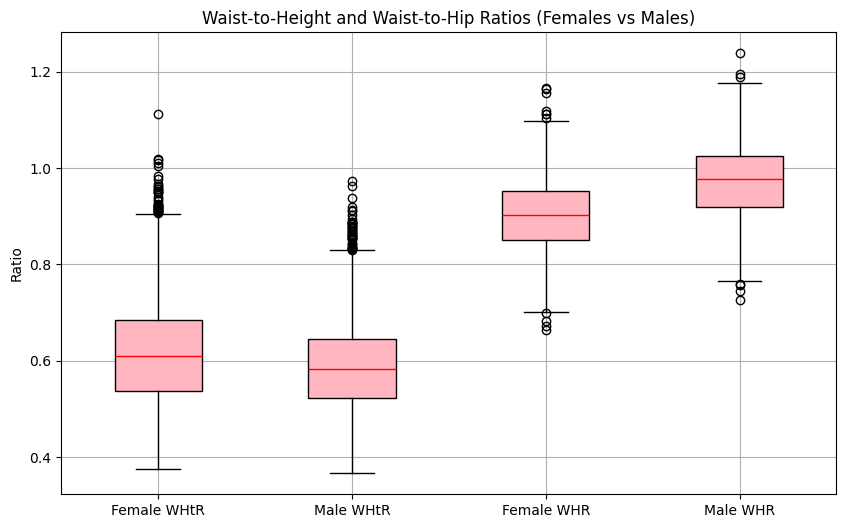

In [3]:
import numpy as np

# Indices:
# waist circumference: column 6
# height: column 1
# hip circumference: column 5

# Waist-to-Height Ratio
female_whtr = female[:, 6] / female[:, 1]
male_whtr = male[:, 6] / male[:, 1]

# Waist-to-Hip Ratio
female_whr = female[:, 6] / female[:, 5]
male_whr = male[:, 6] / male[:, 5]

# Add columns to original matrices
female = np.column_stack((female, female_whtr, female_whr))
male = np.column_stack((male, male_whtr, male_whr))
import matplotlib.pyplot as plt

# Extract the new columns
# Column 7: Waist-to-Height Ratio
# Column 8: Waist-to-Hip Ratio
data = [
    female[:, 7],  # Female WHtR
    male[:, 7],    # Male WHtR
    female[:, 8],  # Female WHR
    male[:, 8]     # Male WHR
]

labels = ["Female WHtR", "Male WHtR", "Female WHR", "Male WHR"]

# Plot
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=labels, patch_artist=True,
            boxprops=dict(facecolor='lightpink'),
            medianprops=dict(color='red'))

plt.title("Waist-to-Height and Waist-to-Hip Ratios (Females vs Males)")
plt.ylabel("Ratio")
plt.grid(True)
plt.show()


Interpretation of the Box-and-Whisker Plot
The plot compares two important body ratio indicators — Waist-to-Height Ratio (WHtR) and Waist-to-Hip Ratio (WHR) — between females and males. Here's what we observe:

🔹 Waist-to-Height Ratio (WHtR)
Females and Males both have similar median WHtR, but:

Females: Slightly higher median (~0.61).

Males: Slightly lower median (~0.58).

Spread (IQR) is similar for both, but:

Females have more outliers on the higher end, indicating a larger number of high WHtR values.

This could imply that some females in the dataset may have higher central adiposity (waist fat) relative to height.

🔹 Waist-to-Hip Ratio (WHR)
Males have a clearly higher WHR than females:

Median for males is around 0.99, while for females it's ~0.90.

This is consistent with known biological differences — females typically store more fat around the hips, while males accumulate more around the waist.

The spread for males is also wider, with more high-end outliers, possibly indicating more abdominal obesity among some male participants.

 Summary
Females have higher variability in WHtR, with more high-ratio outliers.

Males tend to have higher WHR, indicating greater abdominal fat relative to hip circumference.

These ratios are useful indicators for cardiometabolic risk:

WHtR > 0.5 is often flagged as a concern for both sexes.

High WHR (above 0.85 for women, 0.90 for men) can indicate risk of metabolic disorders.

Here’s a concise comparison of BMI, Waist-to-Height Ratio (WHtR), and Waist-to-Hip Ratio (WHR) based on their advantages and disadvantages:

 1. Body Mass Index (BMI)
Definition:
BMI = weight (kg) / height² (m²)

 Advantages:
Simple and quick to calculate.

Commonly used and standardized across medical guidelines.

Good for large population studies and broad categorization (underweight, normal, overweight, obese).

 Disadvantages:
Does not differentiate between fat and muscle. A muscular person may be wrongly classified as overweight.

Ignores fat distribution, which is crucial for health risk assessment.

Not suitable for athletes, elderly, or people with high muscle mass.

 2. Waist-to-Height Ratio (WHtR)
Definition:
WHtR = waist circumference / height

 Advantages:
Takes into account fat distribution, especially abdominal fat, which is more closely linked to cardiovascular risk.

More predictive of health risks (like heart disease, diabetes) than BMI.

Works equally well across ethnic groups and both genders.

Simple rule: Keep your waist less than half your height (WHtR < 0.5).

 Disadvantages:
May vary with posture and measurement technique — accurate waist measurement is crucial.

Not as commonly used in clinical settings yet compared to BMI.

 3. Waist-to-Hip Ratio (WHR)
Definition:
WHR = waist circumference / hip circumference

 Advantages:
Indicates fat distribution, especially the proportion of abdominal fat vs lower body fat.

Helpful in identifying central obesity, which is a strong predictor of metabolic syndrome.

Good for distinguishing "apple-shaped" vs "pear-shaped" body types.

 Disadvantages:
Hip measurements can be inconsistent depending on how and where measured.

Less intuitive for the public than WHtR.

Less predictive in some ethnic groups or in cases of very low or very high BMI.



In [8]:
import numpy as np

# Assuming 'female' matrix has 8 columns now (including BMI)
# Compute column-wise means and standard deviations
means = female.mean(axis=0)
stds = female.std(axis=0)

# Standardize each column (z-score)
zfemale = (female - means) / stds

import numpy as np

# Assuming zfemale is already created and has standardised columns:
# [height, weight, waist, hip, BMI]

# Step 1: Get sorted indices based on BMI column (index 4)
sorted_indices = np.argsort(zfemale[:, 4])

# Step 2: Get the 5 lowest and 5 highest BMI indices
lowest_bmi_indices = sorted_indices[:5]
highest_bmi_indices = sorted_indices[-5:]

# Step 3: Combine the indices
combined_indices = np.concatenate((lowest_bmi_indices, highest_bmi_indices))

# Step 4: Print the standardised values for these participants
print("Standardised measurements for 5 lowest and 5 highest BMI values:\n")
print(zfemale[combined_indices])


Standardised measurements for 5 lowest and 5 highest BMI values:

[[-1.74092033  0.06559138 -0.26899816  0.85300962 -2.64047645 -2.01494541
  -1.68921177 -1.71577146 -0.14756055]
 [-1.88017988 -0.18929313 -1.71835247  0.38637892 -2.4443617  -1.85491922
  -2.05708015 -2.04369083 -1.63576925]
 [-1.843044   -0.26009438 -0.22637009  0.51081377 -2.30173278 -2.25178417
  -1.85590213 -1.82748279 -0.07452609]
 [-1.53667299  1.80730222  0.62619127  0.5730312  -2.26607556 -1.6756899
  -1.7064556  -2.01516552 -0.98358297]
 [-1.74556231 -0.69906216 -1.16418759 -0.51577377 -2.23041833 -1.72049723
  -1.79842269 -1.69051771 -1.15508241]
 [ 4.8042785   0.88688592  2.11817365  1.81737973  3.77782461  4.02124236
   4.08172343  3.73055207  1.18320558]
 [ 2.55291578 -0.33089564  1.26561229  0.26194406  3.86696768  2.72182972
   2.65048552  2.7837812   0.73658652]
 [ 2.13513713  0.4337579   1.90503331  0.04418307  3.99176798  1.57604222
   1.54113243  1.40842521  0.50510055]
 [ 4.72536476  1.11344994  2.24

Lowest BMI Group (Top 5 rows)
All BMI z-scores ≈ -2.2 to -2.6 → Very low BMI

Typical patterns:

Height: Strongly negative (e.g., -1.7 to -1.5), suggesting shorter individuals.

Weight, Waist, Hip: All below average. Especially waist and hip — some values as low as -1.7.

Other measurements (columns 5–9): All significantly below average.

 Interpretation:

These individuals are underweight.

Their other measurements reflect this: narrow waists, hips, lower body fat/mass.

Some of them have average or even slightly above-average upper-body measurements (like row 0: z = +0.06 for weight), but still end up with low BMI due to short stature.

 Highest BMI Group (Bottom 5 rows)
All BMI z-scores ≈ +3.7 to +4.3 → Very high BMI

Typical patterns:

Height: Strongly positive (e.g., 2.1 to 4.8) — very tall individuals.

Weight, Waist, Hip: Far above average. For example:

Waist: up to +2.8 z

Hip: up to +1.9 z

Other measurements (columns 5–9): Also very high.

 Interpretation:

These individuals are obese or extremely overweight.

Their measurements across all dimensions are substantially above average.

A very high BMI corresponds not just to weight but to generally larger body sizes.

